## Independent Variable 
There are 5 independent variables: temperature, pressure, tempeture X pressure , material fusion, and material transformation. 

## Dependent Variable
Quality of the material in the dependent variable in this dataset.




## Background study on manufacturing terms

The quality of a material depends on many independent variable and in this report I am interested to see the specific effect of the temperature, pressure, temperature X pressure , material fusion, and material transormation. To do that I have done a bit of readings which I will share in this section which will the backbone of my report.

#### Thermal properties :
There are 3 properties which corresponds to the concept of a material temperature. These properties include thermal expansion, thermal conductivity, and thermal stress. 

The temperature which a material can stand is called its thermal expansion property. Generally, when a material is heated, it gets expanded . This expansion can change the area,volume, and shape of the material. 
The thermal conductivity of a material correspond its ability that it can conduct. 

The third important propery in relation to temperature is thermal stress. When heat is applied to a material it can undergo either expansion or contraction. 

Consider the below table that provide visualize thermal condutivity of different property:

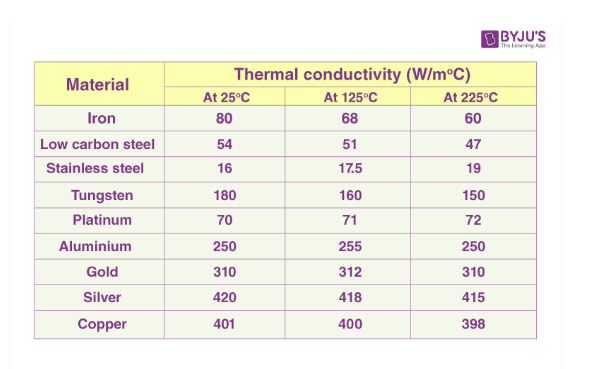

As you can see material conductivity changes at different temperature. Some materials have high thermal conductivity in low temperature and slightly lower temperature when heats go up such as Tungsten. 


### Pressure property:

When assessing material pressure property we can categorize them into metalic and non-metalic property. The key properties that provide basic understanding of a materual pressure propert include Strength, Elasticity, Plasticity, ULTIMATE TENSILE STRESS (UTS), ALLOWABLE (DESIGN) STRESS, DUCTILITY,TOUGHNESS, CHARPY IMPACT TESTING,HARDNESS. I will discuss about Strength, Elasticity, and Plasticity in this report.

#### 1. Strength: 
The strength of a material is measured by pulling a test spicemen in tension until a fracture occurs . 
####  2. Elasticity: 
"The ability of a deformed material body to return to its original shape and size when the forces causing the
deformation are removed". It is important to mention that elasticity property has limitation. The below graph shows this property:

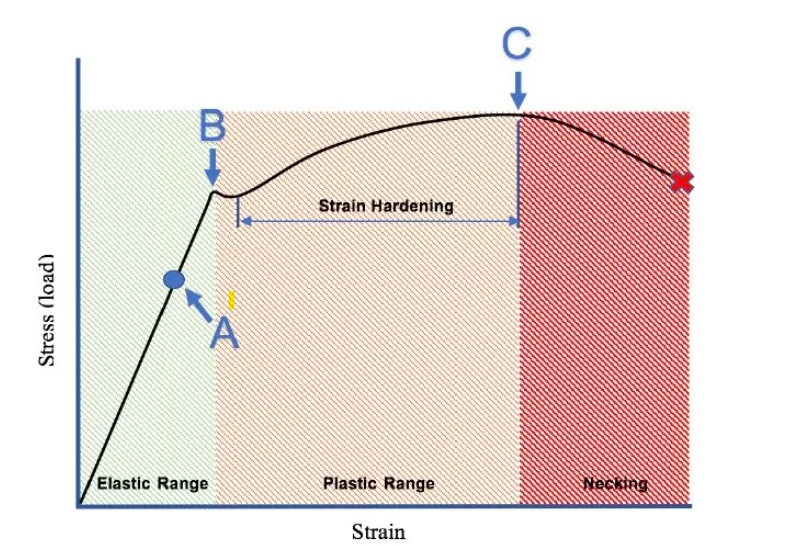

#### 4.Plasticity:
Once the material pass its elasticity limit, it enters its plasticity limit. As the material undergo its elongation within its plasticity range, it is now under plastic deformation. In this process, the material is getting stronger due to work hardening(strain hardening) which is a consequence of plastic deformation.  






#### 4.Temperature x Pressure: 
This feature is an interaction term between temperature and pressure, which captures the combined effect of these two process parameters.

#### 5. Material Fusion Metric:

Represents a material fusion-related measurement during the manufacturing process.

##### Fusion = temperature^2 + pressure ^3

Many material fusion processes have optimal temperature and pressure ranges. Exceeding these ranges can actually degrade material properties. For example:

        Too High Temperature:
        Might cause unwanted reactions, material degradation (such as thermal decomposition), or excessive internal stresses.

        Too High Pressure:
        Could lead to structural weaknesses, like cracks or voids, especially if the material does not uniformly respond to pressure.





#### 6. Material Transformation Metric:

transformation = temperature^3 - pressure ^2

By cubing the temperature, this metric suggests a highly non-linear response of the material's transformation properties to changes in temperature. This could indicate scenarios where temperature has a more pronounced effect on the transformation than pressure.

The squared term for pressure, being subtracted, suggests that increasing pressure might counteract or reduce some of the effects induced by high temperatures. This could be relevant in processes where pressure is used to stabilize or control the material properties.




 It provides insight into material transformation dynamics.

Resources:
1. 
https://byjus.com/physics/thermal-properties-of-materials/#:~:text=a%20railway%20track-,Thermal%20conductivity,the%20ones%20with%20low%20conductivity.


2. 
https://wilkinsoncoutts.com/back-to-basics-material-properties/


# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split



dataframe = pd.read_csv("https://raw.githubusercontent.com/mpaydar/Regression_Modeling/main/Manufacturing/manufacturing.csv")
dataframe.head()


,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


We are working with five independent variables and 1 dependent variable as previously mentioned.

###  DataTypes

In [2]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


Looks like we are only working with float data type. 

### Statistical summary:

In [3]:
dataframe.describe()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
count,3957.000000,3957.000000,3957.000000,3957.000000,3.957000e+03,3957.000000
mean,200.034704,14.815558,2955.321308,48127.183128,1.003645e+07,96.260179
std,58.135717,5.772040,1458.224940,23812.213513,7.599356e+06,12.992262
min,100.014490,5.003008,513.706875,10156.971955,9.999462e+05,1.000000
25%,150.871296,9.692984,1798.247303,27626.929091,3.433810e+06,99.941129
50%,198.603371,14.832557,2678.277782,44611.452164,7.833390e+06,99.999997
75%,251.366552,19.749680,3929.058261,67805.443846,1.588251e+07,100.000000
max,299.992804,24.999132,7365.018714,103756.181544,2.699783e+07,100.000000


After inspecting the initial inspection of values for each attributes, it looks like we have big gaps between all the attributes which require some regularization as part of the preprocessing phase. 

In [4]:
selected_featurs=dataframe[['Material Transformation Metric','Material Fusion Metric','Temperature (°C)']]



X_train, X_test, y_train, y_test = train_test_split(selected_featurs, dataframe['Quality Rating'], test_size=0.3, random_state=42)
model_one= LinearRegression()
optimized_coefficients=model_one.fit(X_train,y_train)

print(f'Optimized Slope: {optimized_coefficients.coef_}')
print(f'Optimized Y-intercept: {optimized_coefficients.intercept_}')

rows,columns=selected_featurs.shape
y_predictions=model_one.predict(X_test)

r2_square=r2_score(y_predictions,y_test)
mse = mean_squared_error(y_predictions,y_test)
print(f'R-Square {r2_square}')
print(f'Mean Square Error: {mse}')

Optimized Slope: [-3.83277284e-06  7.33122830e-05  3.59507968e-01]
Optimized Y-intercept: 59.427962323912276
R-Square -0.2793533843003997
Mean Square Error: 99.76564880157804


### Regularizing the dataframe using MinMax()

In [5]:
scaler=MinMaxScaler()
regularized_dataframe = dataframe.copy(deep=True)
regularized_dataframe=regularized_dataframe.drop(columns=['Quality Rating'])
sclaled_dataframe=scaler.fit_transform(regularized_dataframe)
column_names=dataframe.iloc[:,0:5].columns
sclaled_dataframe=pd.DataFrame(sclaled_dataframe,columns=column_names)
sclaled_dataframe

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric
0,0.548801,0.152422,0.171509,0.367153,0.316550
1,0.715194,0.540558,0.485925,0.564789,0.513712
2,0.602756,0.142034,0.177501,0.416339,0.374201
3,0.544870,0.939336,0.650537,0.501841,0.312555
4,0.423628,0.539845,0.350975,0.298199,0.204011
...,...,...,...,...,...
3952,0.284016,0.839727,0.423844,0.264799,0.109838
3953,0.489233,0.164467,0.164466,0.315792,0.259436
3954,0.706790,0.569555,0.502473,0.560910,0.502334
3955,0.545188,0.940529,0.651485,0.502558,0.312875


### Boxplots of Independent Variables

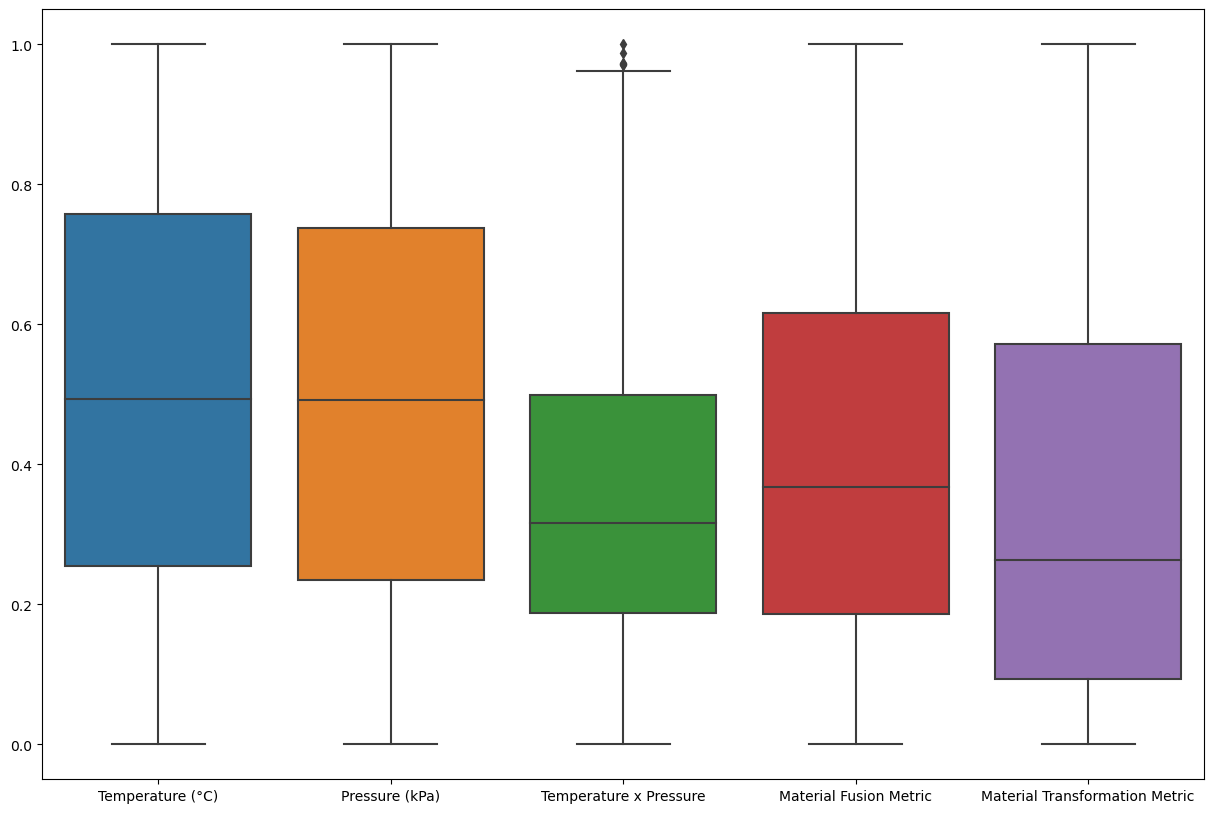

In [6]:
plt.figure(figsize=(15,10))
independent_variables=sclaled_dataframe

sns.boxplot(data=independent_variables)
plt.show()

looks like there are few tuples that are outliers in temperature X pressure. The best approach to handle these few outliers is the dropping of these rows since it is not a significant number. 

### Removing outliers

In [7]:
# Calculating Q1, Q3, and IQR
Q1 = dataframe['Temperature x Pressure'].quantile(0.25)

Q3 = dataframe['Temperature x Pressure'].quantile(0.75)


IQR = Q3 - Q1

# Defining outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


dataframe = dataframe[(dataframe['Temperature x Pressure'] > lower_bound) & (dataframe['Temperature x Pressure'] < upper_bound)]







Q1 = sclaled_dataframe['Temperature x Pressure'].quantile(0.25)

Q3 = sclaled_dataframe['Temperature x Pressure'].quantile(0.75)


IQR = Q3 - Q1

# Defining outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


sclaled_dataframe= sclaled_dataframe[(sclaled_dataframe['Temperature x Pressure']>lower_bound) & (sclaled_dataframe['Temperature x Pressure'] < upper_bound)]
sclaled_dataframe




,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric
0,0.548801,0.152422,0.171509,0.367153,0.316550
1,0.715194,0.540558,0.485925,0.564789,0.513712
2,0.602756,0.142034,0.177501,0.416339,0.374201
3,0.544870,0.939336,0.650537,0.501841,0.312555
4,0.423628,0.539845,0.350975,0.298199,0.204011
...,...,...,...,...,...
3952,0.284016,0.839727,0.423844,0.264799,0.109838
3953,0.489233,0.164467,0.164466,0.315792,0.259436
3954,0.706790,0.569555,0.502473,0.560910,0.502334
3955,0.545188,0.940529,0.651485,0.502558,0.312875


After filtering the tuples for the outliers, we have lost 6 of the tuples from the dataset which does not result in significant loss of information as it is important when choosing the strategy to handle the outliers. 

Now let's see a correlation tables which can help us to select the most relavant features to quality rating. Selecting the most correlated attributes helps us to develop a more optimize data model. 

### Correlation Matrix

In [8]:
dataframe.corr()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
Temperature (°C),1.000000,-0.029020,0.569412,0.975047,0.971190,-0.458466
Pressure (kPa),-0.029020,1.000000,0.772762,0.146236,-0.028192,0.021349
Temperature x Pressure,0.569412,0.772762,1.000000,0.691942,0.551918,-0.248342
Material Fusion Metric,0.975047,0.146236,0.691942,1.000000,0.976583,-0.507650
Material Transformation Metric,0.971190,-0.028192,0.551918,0.976583,1.000000,-0.572799
Quality Rating,-0.458466,0.021349,-0.248342,-0.507650,-0.572799,1.000000


Upon inspection of correlation matrix, the strongest correlation is material transformation followed by  material fusion, temperature , and temperature X Pressure. Although these are among the stronger correlation, they are negative. For the purpose of the polynomial model, we want to select **Material   Transformation Metric, Material Fusion Metric, and Temperature (°C)**. 


### Feature Selection

In [9]:
selected_featurs=sclaled_dataframe[['Material Transformation Metric','Material Fusion Metric','Temperature (°C)']]
selected_featurs

,Material Transformation Metric,Material Fusion Metric,Temperature (°C)
0,0.316550,0.367153,0.548801
1,0.513712,0.564789,0.715194
2,0.374201,0.416339,0.602756
3,0.312555,0.501841,0.544870
4,0.204011,0.298199,0.423628
...,...,...,...
3952,0.109838,0.264799,0.284016
3953,0.259436,0.315792,0.489233
3954,0.502334,0.560910,0.706790
3955,0.312875,0.502558,0.545188


# Model Development

## Model 1 (Linear Regression)

In [10]:


X_train, X_test, y_train, y_test = train_test_split(selected_featurs, dataframe['Quality Rating'], test_size=0.3, random_state=42)
model_one= LinearRegression()
optimized_coefficients=model_one.fit(X_train,y_train)

print(f'Optimized Slope: {optimized_coefficients.coef_}')
print(f'Optimized Y-intercept: {optimized_coefficients.intercept_}')

rows,columns=selected_featurs.shape
y_predictions=model_one.predict(X_test)

r2_square=r2_score(y_predictions,y_test)
mse = mean_squared_error(y_predictions,y_test)
print(f'R-Square {r2_square}')
print(f'Mean Square Error: {mse}')








Optimized Slope: [-103.11369358   10.8203261    71.0441832 ]
Optimized Y-intercept: 92.23235524362386
R-Square -0.11816680588144002
Mean Square Error: 92.557680221218


## Model 2 (Polynomial Regression)

### Preprocessing steps for model 2: "Expanded" Matrix of the selected_featurs matrix

In [11]:
# plt.scatter(selected_featurs['Temperature (°C)'], dataframe['Quality Rating'], alpha=0.5)  # Plot scatter
poly=PolynomialFeatures(3)
X_Poly=poly.fit_transform(selected_featurs)
pd.DataFrame(X_Poly)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,0.316550,0.367153,0.548801,0.100204,0.116222,0.173723,0.134801,0.201494,0.301182,0.031720,0.036790,0.054992,0.042671,0.063783,0.095339,0.049493,0.073979,0.110580,0.165289
1,1.0,0.513712,0.564789,0.715194,0.263900,0.290139,0.367404,0.318986,0.403934,0.511503,0.135569,0.149048,0.188740,0.163867,0.207506,0.262765,0.180160,0.228137,0.288891,0.365824
2,1.0,0.374201,0.416339,0.602756,0.140027,0.155795,0.225552,0.173338,0.250951,0.363315,0.052398,0.058299,0.084402,0.064863,0.093906,0.135953,0.072167,0.104481,0.151262,0.218990
3,1.0,0.312555,0.501841,0.544870,0.097690,0.156853,0.170302,0.251844,0.273438,0.296883,0.030534,0.049025,0.053229,0.078715,0.085464,0.092792,0.126386,0.137222,0.148988,0.161763
4,1.0,0.204011,0.298199,0.423628,0.041620,0.060836,0.086425,0.088923,0.126326,0.179461,0.008491,0.012411,0.017632,0.018141,0.025772,0.036612,0.026517,0.037670,0.053515,0.076025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3946,1.0,0.109838,0.264799,0.284016,0.012064,0.029085,0.031196,0.070119,0.075207,0.080665,0.001325,0.003195,0.003426,0.007702,0.008261,0.008860,0.018567,0.019915,0.021360,0.022910
3947,1.0,0.259436,0.315792,0.489233,0.067307,0.081928,0.126925,0.099725,0.154496,0.239349,0.017462,0.021255,0.032929,0.025872,0.040082,0.062096,0.031492,0.048789,0.075584,0.117097
3948,1.0,0.502334,0.560910,0.706790,0.252340,0.281764,0.355045,0.314620,0.396445,0.499552,0.126759,0.141540,0.178351,0.158044,0.199148,0.250942,0.176473,0.222370,0.280204,0.353078
3949,1.0,0.312875,0.502558,0.545188,0.097891,0.157238,0.170576,0.252564,0.273988,0.297230,0.030628,0.049196,0.053369,0.079021,0.085724,0.092996,0.126928,0.137695,0.149375,0.162046


### Shape of the Expanded matrix

In [12]:
X_Poly.shape

(3951, 20)

When working toward a polynomial model, we need to expand the input matrix in a way to capture more complex patterns. For the purpose of this analysis we are looking at a degree of 3 polynomial. 

### Training phase

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_Poly, dataframe['Quality Rating'], test_size=0.3, random_state=42)
model_one=LinearRegression()
r=model_one.fit(X_train,y_train)
print(f'Optimized-Slope:{r.coef_}  \nOptimized-Y-Intercept: {r.intercept_}')

Optimized-Slope:[ 0.00000000e+00  1.96202021e+06  3.94069882e+02 -4.53016469e+05
 -5.01055338e+06  8.84514649e+03 -4.09830047e+05 -9.16470486e+02
 -1.68724988e+03 -5.44532643e+05 -1.44980585e+05  4.44860222e+02
  1.35819604e+06  9.19226097e+02 -6.67137513e+03  3.45151934e+06
  3.39022773e+02  2.77589167e+02 -3.09116594e+03 -2.07769527e+05]  
Optimized-Y-Intercept: 67.16373647352911


### Predictions vs Actual Quality Rating : Material Transformation Metric

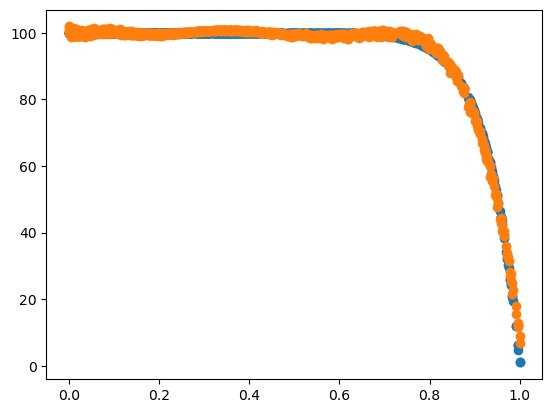

In [14]:
y_predictions=model_one.predict(X_test)

plt.scatter(pd.DataFrame(X_test).iloc[:,1:2],y_test)
plt.scatter(pd.DataFrame(X_test).iloc[:,1:2],y_predictions)
plt.show()


## Predictions vs Actual Quality Ratings ( Material Fusion Metric vs Quality Rating)

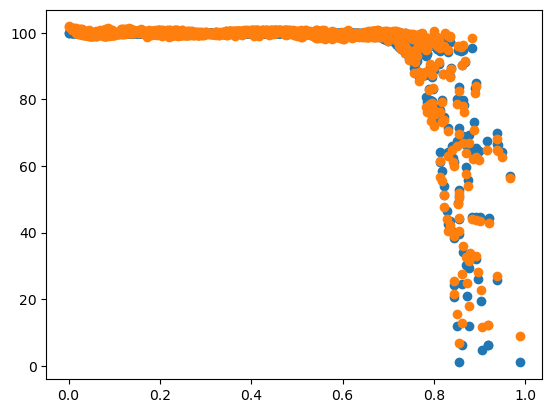

In [15]:
plt.scatter(pd.DataFrame(X_test).iloc[:,2:3],y_test)
plt.scatter(pd.DataFrame(X_test).iloc[:,2:3],y_predictions)
plt.show()

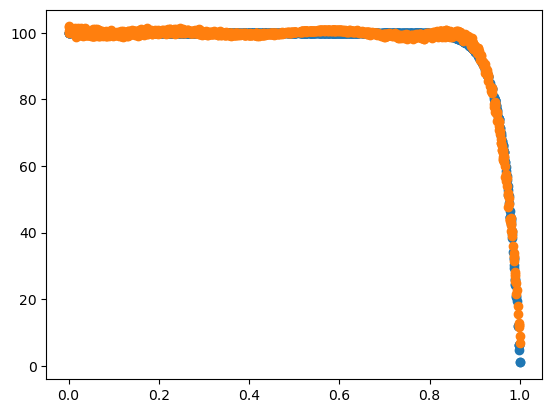

In [16]:
plt.scatter(pd.DataFrame(X_test).iloc[:,3:4],y_test)
plt.scatter(pd.DataFrame(X_test).iloc[:,3:4],y_predictions)
plt.show()

##  Evaluation of Polynomial Regression model

In [17]:
from sklearn.metrics import mean_squared_error,r2_score


mse = mean_squared_error(y_test, y_predictions)
R2_score= r2_score(y_test, y_predictions)
a=pd.DataFrame({'MSE': [mse],'R-Squared': [R2_score] })
# b= pd.DataFrame({'R-Squared': [R2_score]})
a.unstack()

MSE        0    0.983533
R-Squared  0    0.994496
dtype: float64

As indicated by the R-Squared metric, the regression curves fits the data 99.4% which is amazing. Also,  the mean square error metrics confirms the accuracy of this model which measures the average difference between the  predictions and actual y. The average difference is less than 1 which means the regression curve fits the data so well. 

## Conclusion

We can conclude that the quality of parts stays well to some pivot point at which it drops sharply. At about 0.80 , we see the same type of drop for all attributes of parts. 